**Classifying Handwritten Digits using CNN**

In [ ]:
#importing the libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical   #encoding categorical data
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#load the data and split it into train and test data
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#get image shape
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


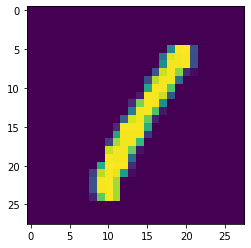

In [ ]:
#plot image example
plt.imshow(x_train[3])

In [ ]:
#reshape the data to fit the model
x_train=x_train.reshape(60000,28,28,1)    #depth of 1 means grayscale
x_test=x_test.reshape(10000,28,28,1)

In [ ]:
#one hot encoding
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

y_train_one_hot[0]    #checking if 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#build cnn model
model = Sequential()    #build the architecture
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())  #turn them into 1 dim vector/array to connect to neural net
model.add(Dense(10, activation='softmax'))

In [ ]:
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])   #categorical_crossentropy to classify more than 2

In [ ]:
#train the model
hist = model.fit(x_train, y_train_one_hot, validation_data=(x_test,y_test_one_hot), epochs=3)  #default batch size=32

Epoch 1/3
1875/1875 [==============================] - 173s 92ms/step - loss: 0.8447 - accuracy: 0.9072 - val_loss: 0.1008 - val_accuracy: 0.9675
Epoch 2/3
1875/1875 [==============================] - 172s 91ms/step - loss: 0.0685 - accuracy: 0.9787 - val_loss: 0.0806 - val_accuracy: 0.9752
Epoch 3/3
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0441 - accuracy: 0.9857 - val_loss: 0.0913 - val_accuracy: 0.9749


<function matplotlib.pyplot.show>

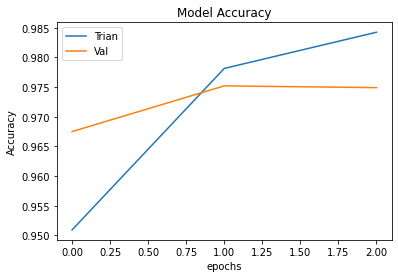

In [ ]:
#visualise the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Trian','Val'], loc='upper left')
plt.show

In [ ]:
#show probability for predictions of first 4 images in test set
pred = model.predict(x_test[:4])

In [ ]:
#print predictions as number label (1st 4 images)
print(np.argmax(pred, axis=1))
#print the actual value
print(y_test[:4])

[7 2 1 0]
[7 2 1 0]


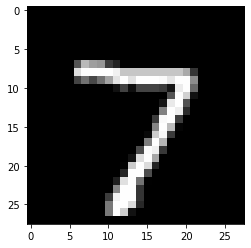

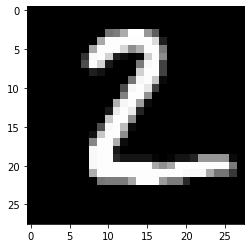

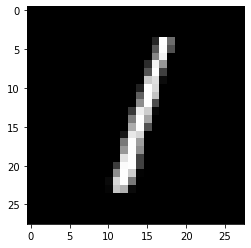

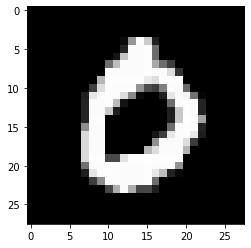

In [ ]:
#show 1st 4 images as picture
for i in range(0,4):
  image = x_test[i]
  image = np.array(image, dtype='float')
  pixels = image.reshape((28,28))
  plt.imshow(pixels, cmap='gray')
  plt.show()
